# The ultimate thin client: Boot from Google Drive and Colab



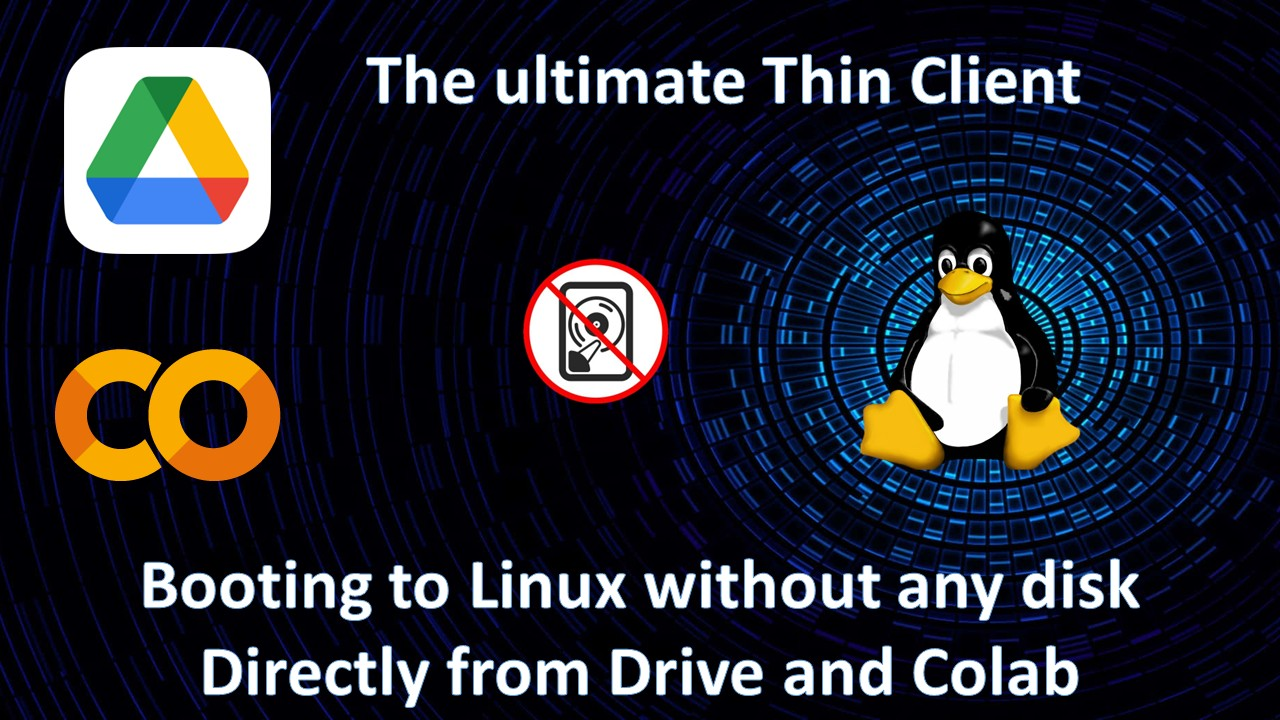

## This would require about 6 GB of space in the Google drive depending on the OS.

## Prerequisites



*   The target machine to boot (Obviously)
*   A boot server (This colab uses Windows 7 or up or Windows Server 2012 or up)
*   All machines should have wired connectivity
*   A switch and ethernet cables for the wired network
*   A Google account with Google Drive with atleast 5 GB of free space.

Note: If the PCs don't support ethernet connectivity, use a USB Ethernet NIC.



## Initializing Colab
Make a copy of this colab notebook to your Google Drive before you start working

## Set up User accounts

Create a non-microsoft user account which is password protected. The following cell will define the username and password

(If this user does not exist, it will be created automatically.)

⚠️ Use the same username and password every time you run this colab so that too many users are not created

In [ ]:
username = input("Enter username for boot server: ")
password = input("Enter password for boot server: ")

## Set up network

Make sure this PC is on a Wired connection (not Wifi) If not, connect it to a switch by ethernet cable

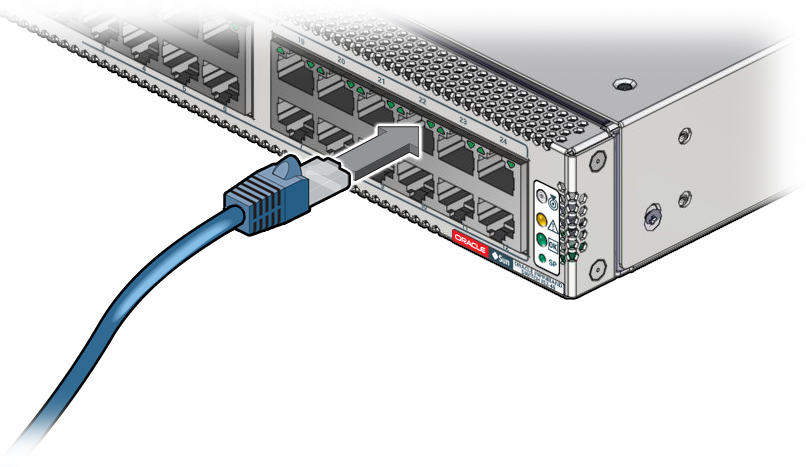

Go to Control Panel -> Network and Internet -> Network and Sharing Center -> Change Adapter Settings -> Open your wired network adapter


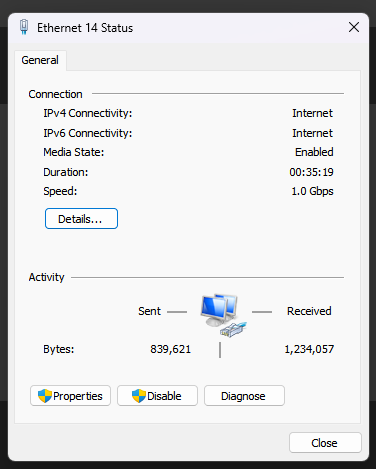

Go to details and note down IP Address, Subnet Mask, Default Gateway, DNS Servers

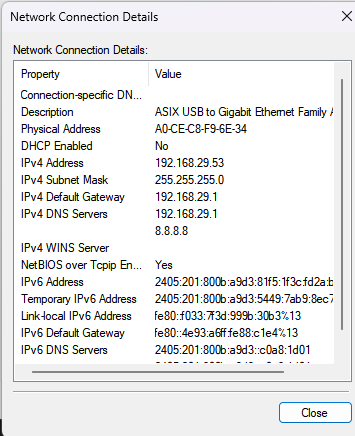

Go to properties and double click on Internet Protocol Version 4

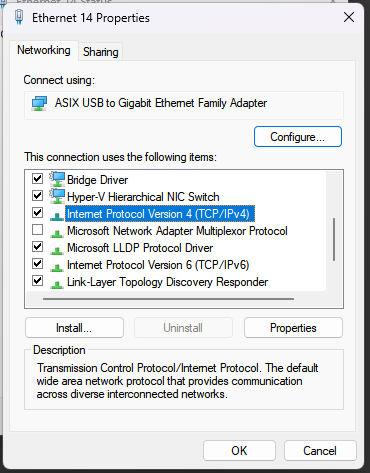

Set the IP you noted earlier as static IP

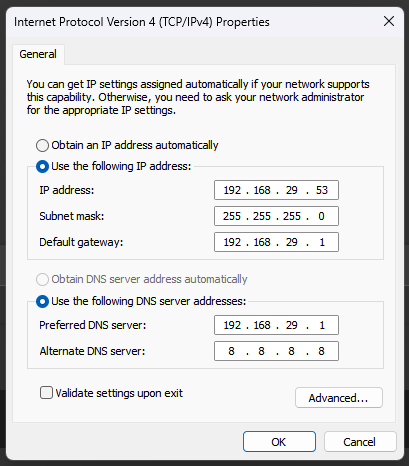

## Removing existing DHCP Servers

Ensure that there is no other DHCP server in the network. If you are using a home router or another DHCP server, disable it.

The following image shows how to disable it from a Jio router

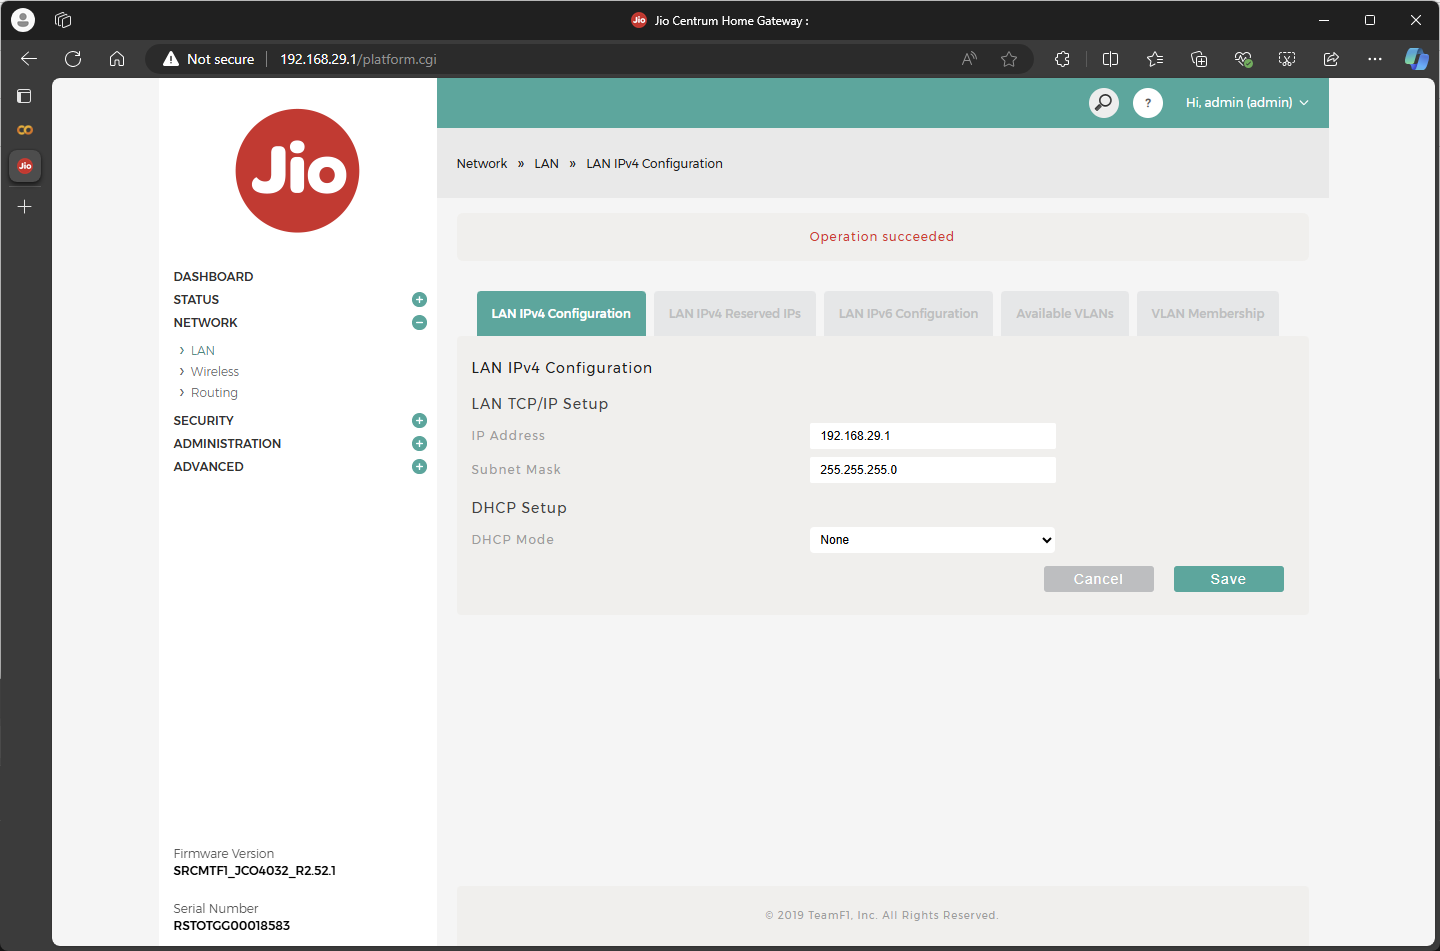

## Google Drive Client installation

Download and install the Google Drive client from https://www.google.com/intl/en-GB/drive/download/

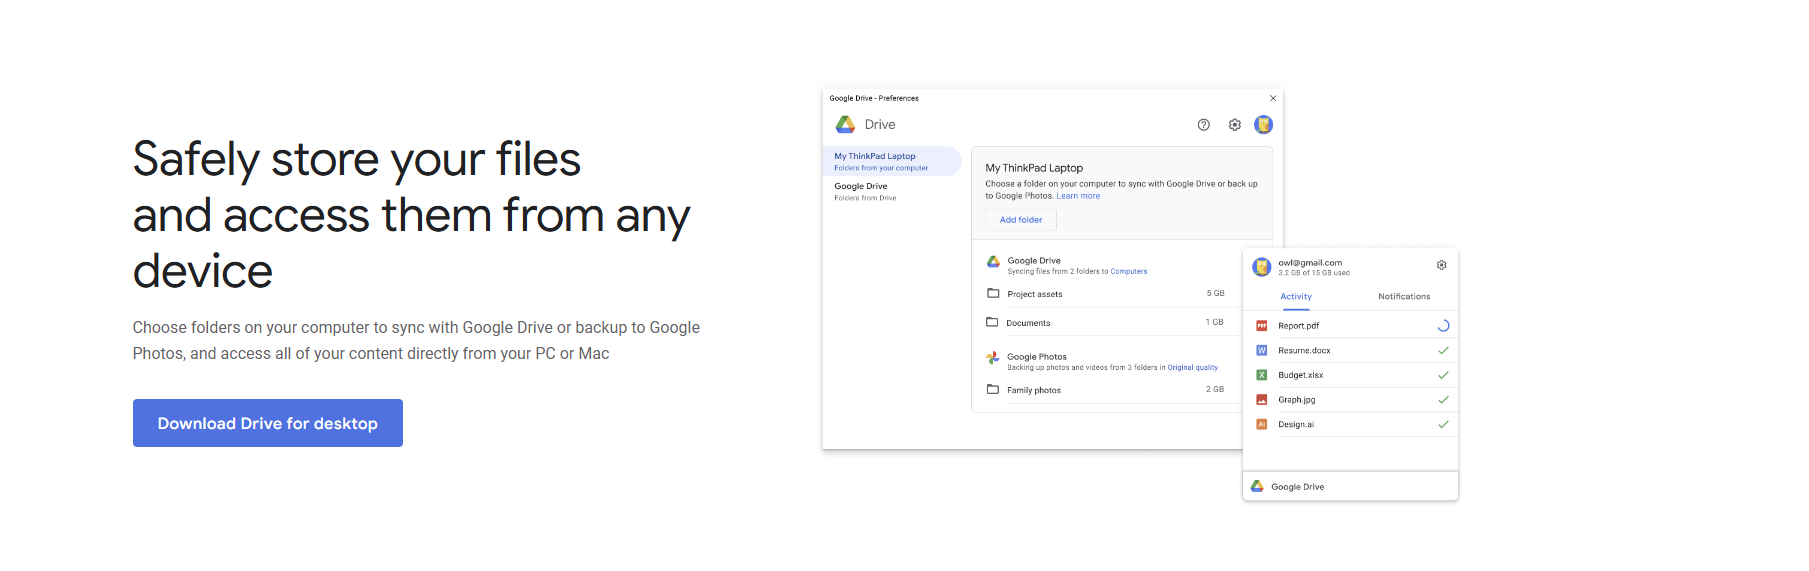

Set it up by logging in

Go to preferences and set up Mirror mode

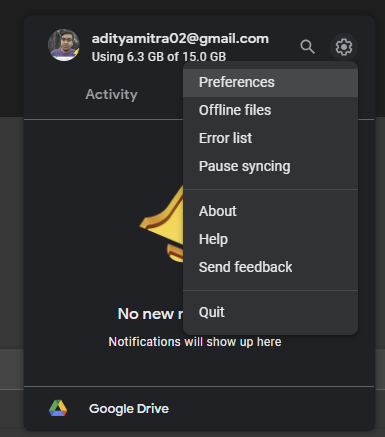

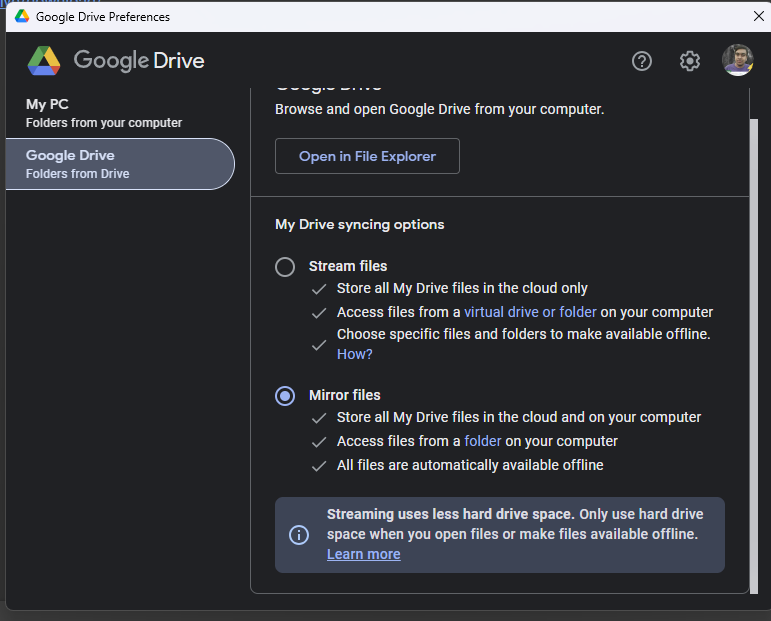

# Whatever setup you did above is only one time. Don't have to do it everytime. 🙂

## Google Drive configuration
(Run the following cells)

Connect to Google Drive (allow all permissions)

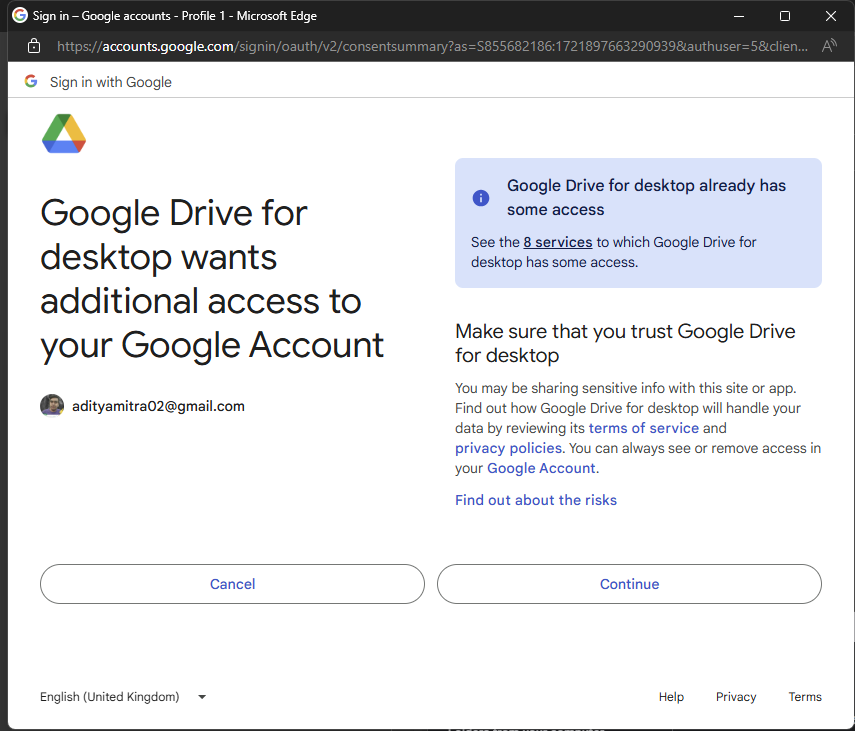

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

⚠️⚠️⚠️ Warning: To clear old config

🗑️ Remember to empty the Bin in Drive

In [ ]:
!rm -rf /content/drive/MyDrive/Serva

## Download Serva

In [ ]:
!wget https://www.vercot.com/~serva/download/Serva_Community_v4.6.0-21120715.zip
!unzip -o -q "/content/Serva_Community_v4.6.0-21120715.zip" -d "/content/drive/MyDrive/Serva"
!rm *.zip
!mkdir /content/drive/MyDrive/Serva/NWA_PXE

## Generation of config files

In [ ]:
ipaddr=input("Enter IP address of boot server: ")
subnetmast=input("Enter subnet mask of boot server: ")
gateway=input("Enter default gateway of boot server: ")
dns=input("Enter DNS server of boot server: ")

In [ ]:
octets=ipaddr.split('.')
octets[3]=str(int(octets[3])+1)
if octets[3]=='256':
  octets[2]=str(int(octets[2])+1)
  octets[3]='0'
if octets[2]=='256':
  octets[1]=str(int(octets[1])+1)
  octets[2]='0'
if octets[1]=='256':
  octets[0]=str(int(octets[0])+1)
  octets[1]='0'

nextip='.'.join(octets)
print("IP Pool will start from", nextip)

configcreator='''
@echo off
setlocal enabledelayedexpansion

:: Get the current directory
set "TFTP_RootDirectory=%~dp0"
SET "folderPath=%~dp0"

:: Write the configuration to a file
(
echo [SERVA]
echo SERVA_HideWnd=0
echo SERVA_Services=517
echo SERVA_UseEventLog=0
echo SERVA_LogFile=
echo SERVA_ConsolePassword=serva3264
echo SERVA_LastWindowPos=70,53,770,618
echo [TFTP]
echo TFTP_RootDirectory=%TFTP_RootDirectory%
echo TFTP_Port=69
echo TFTP_LimitNegotiatedWindowsize=16
echo TFTP_LimitNegotiatedBlksize=1468
echo TFTP_MinInterFrameDelay=80
echo TFTP_ErrorSimulator=
echo TFTP_DirTextFile=0
echo TFTP_Timeout=3
echo TFTP_MaxRetransmit=6
echo TFTP_SecurityLevel=3
echo TFTP_TranslateUnixFileNames=1
echo TFTP_Beep=0
echo TFTP_BackSlashAsVirtualRoot=0
echo TFTP_MD5File=0
echo TFTP_LocalIP=fill_ip_addr
echo TFTP_LowestUDPPort=0
echo TFTP_HighestUDPPort=0
echo TFTP_MulticastPort=0
echo TFTP_MulticastAddress=
echo TFTP_MaxSimultaneousTransfers=100
echo TFTP_SupportForPortOption=0
echo TFTP_IgnoreLastPacketAck=0
echo [TFTPC]
echo TFTPC_Server=
echo TFTPC_Blksize=1468
echo TFTPC_Windowsize=8
echo TFTPC_RemoteFile=
echo TFTPC_LocalFile=
echo TFTPC_MinInterFrameDelay=80
echo [FTP]
echo FTP_LocalIP=
echo FTP_Port=21
echo FTP_LowestDataPort=49152
echo FTP_HighestDataPort=51152
echo FTP_Anonymous=0
echo FTP_Usr1Name=
echo FTP_Usr1Pass=
echo FTP_Usr2Name=
echo FTP_Usr2Pass=
echo FTP_Usr3Name=
echo FTP_Usr3Pass=
echo FTP_AnonymousRootDirectory=
echo FTP_RegiteredRootDirectory=
echo [HTTP]
echo HTTP_LocalIP=
echo HTTP_Port=80
echo HTTP_DefaultPage=index.htm
echo HTTP_AllowFileBrowsing=0
echo HTTP_RootDir=
echo HTTP_TruncateGETFileName64=1
echo [DNS]
echo DNS_LocalIP=
echo [SYSLOG]
echo SYS_LOGLocalIP=
echo SYSLOG_SaveLogToFile=
echo SYSLOG_ForwardLogToPipe=0
echo [SNTP]
echo SNTP_LocalIP=
echo [DHCP]
echo DHCP_PersistantLeases=0
echo DHCP_PingAddress=0
echo DHCP_LocalIP=fill_ip_addr
echo DHCP_PoolSize=10
echo DHCP_IP_Pool=fill_next_ip
echo DHCP_IP_NextServer=fill_ip_addr
echo DHCP_IP_Mask=fill_subnet
echo DHCP_BootFile=\BM\PXESERVA\BIOS\pxeserva.0^|6?\BM\PXESERVA\EFI32\pxeserva.efi^|7?\BM\PXESERVA\EFI64\pxeserva.efi^|9?\BM\PXESERVA\EFI64\pxeserva.efi
echo DHCP_DefaultGateway=fill_gateway
echo DHCP_DNS=fill_dns
echo DHCP_DomainName=
echo DHCP_LeaseTime=2880
echo DHCP_ProcStatLeases=0
echo DHCP_ProcMacFilter=0
echo DHCP_BINL_BM_Mode=1
echo DHCP_Option1=
echo DHCP_Option2=
echo DHCP_Option3=
echo DHCP_Option4=
echo DHCP_Option5=
echo DHCP_Option6=
echo DHCP_Option7=
echo DHCP_Option8=
echo DHCP_Option9=
echo DHCP_Option10=
echo DHCP_StaticLease1=
echo DHCP_StaticLease2=
echo DHCP_StaticLease3=
echo DHCP_StaticLease4=
echo DHCP_StaticLease5=
echo DHCP_StaticLease6=
echo DHCP_StaticLease7=
echo DHCP_StaticLease8=
echo DHCP_StaticLease9=
echo DHCP_StaticLease10=
echo DHCP_MacFilter1=
echo DHCP_MacFilter2=
echo DHCP_MacFilter3=
echo DHCP_MacFilter4=
echo DHCP_MacFilter5=
echo DHCP_MacFilter6=
echo DHCP_MacFilter7=
echo DHCP_MacFilter8=
echo DHCP_MacFilter9=
echo DHCP_MacFilter10=
) > "%folderPath%Serva.ini"
echo Configuration file created
SET "folderPath=%~dp0"
net share NWA_PXE_SHARE="%folderPath%NWA_PXE" /GRANT:Everyone,Read
start "" "%~dp0Serva64.exe"
'''
configcreator=configcreator.replace('fill_ip_addr', ipaddr)
configcreator=configcreator.replace('fill_subnet', subnetmast)
configcreator=configcreator.replace('fill_gateway', gateway)
configcreator=configcreator.replace('fill_dns', dns)
configcreator=configcreator.replace('fill_next_ip', nextip)

file=open('/content/drive/MyDrive/Serva/configcreator.bat','w')
file.write(configcreator)
file.close()

installer='''
SET "folderPath=%~dp0"
net user fill_username fill_pass /add
net localgroup administrators fill_username /add
DISM /Online /Enable-Feature /FeatureName:"SMB1Protocol" /All /NoRestart
call "%folderPath%configcreator"
set startupFolder=%APPDATA%\Microsoft\Windows\Start Menu\Programs\Startup
mklink "%startupFolder%\runner.bat" "%~dp0../runner.bat"
echo "Rebooting in 15 seconds."
shutdown -r -f -t 15 -c "Restarting to complete Network file share installation."
'''
installer=installer.replace('fill_username', username)
installer=installer.replace('fill_pass', password)
file=open('/content/drive/MyDrive/Serva/installer.bat','w')
file.write(installer)
file.close()

runner='''
@echo off
setlocal enabledelayedexpansion enableextensions
:inithere
set "folder=%~dp0"
for /f %%i in ('powershell -command "(Get-Date).AddSeconds(-10).ToString('ddHHmmss')"') do set "time_check=%%i"
set "modified=no"
for /r "%folder%" %%f in (*) do (
    set "filename=%%~nf"
set "str1=%%f"
echo.%%f | findstr /C:"tmp" 1>nul
if errorlevel 1 (
    for /f %%t in ('powershell -command "(Get-Item '%%f').CreationTime.ToString('ddHHmmss')"') do (
           echo %%f %%t %time_check%
	    if %%t gtr %time_check% (
		echo "Modified"
                set "modified=yes"
                goto :end
            )
        )
)
)
:end
if "%modified%"=="yes" (
	echo syncing
    	QPROCESS "Serva64.exe">NUL
	if errorlevel 0 (
		taskkill /F /IM "Serva64.exe"
	)
) else (
echo not syncing
        QPROCESS "Serva64.exe">NUL
	if errorlevel 1 (
		call "%folder%Serva\configcreator"
	)
)
timeout /t 10
goto :inithere

'''
file=open('/content/drive/MyDrive/runner.bat','w')
file.write(runner)
file.close()

## OS Installation

This colab gives you 2 cells, Ubuntu and Ubuntu Mate. Run any one or both as you wish.

Asset file initialization: If you are using any other distro, refer to https://www.vercot.com/~serva/an/NonWindowsPXE3.html

## Ubuntu installation

In [ ]:
!wget https://releases.ubuntu.com/focal/ubuntu-20.04.6-desktop-amd64.iso
!7z x ubuntu-20.04.6-desktop-amd64.iso -o/content/drive/MyDrive/Serva/NWA_PXE/Ubuntu
!rm *.iso

servaasset='''
[PXESERVA_MENU_ENTRY]
asset    = Ubuntu LTS 20.04 Desktop Live
platform = amd64

kernel_bios    = /NWA_PXE/$HEAD_DIR$/casper/vmlinuz
append_bios    = showmounts toram root=/dev/cifs initrd=/NWA_PXE/$HEAD_DIR$/casper/initrd boot=casper netboot=cifs nfsroot=//$IP_BSRV$/NWA_PXE_SHARE/$HEAD_DIR$ NFSOPTS=-ouser=servauser,pass=servapass,sec=ntlmv2,vers=2.0,ro ip=dhcp ro ipv6.disable=1

kernel_efi64   = /NWA_PXE/$HEAD_DIR$/casper/vmlinuz
append_efi64   = showmounts toram root=/dev/cifs initrd=/NWA_PXE/$HEAD_DIR$/casper/initrd boot=casper netboot=cifs nfsroot=//$IP_BSRV$/NWA_PXE_SHARE/$HEAD_DIR$ NFSOPTS=-ouser=servauser,pass=servapass,sec=ntlmv2,vers=2.0,ro ip=dhcp ro ipv6.disable=1
'''
servaasset=servaasset.replace('servauser', username)
servaasset=servaasset.replace('servapass', password)
file=open('/content/drive/MyDrive/Serva/NWA_PXE/Ubuntu/ServaAsset.inf','w')
file.write(servaasset)
file.close()

⚠️ To delete Ubuntu

In [ ]:
!rm -rf /content/drive/MyDrive/Serva/NWA_PXE/Ubuntu

## Ubuntu Mate installation

In [ ]:
!wget https://releases.ubuntu-mate.org/20.04/amd64/ubuntu-mate-20.04.3-desktop-amd64-topjoy-falcon.iso
!7z x ubuntu-mate-20.04.3-desktop-amd64-topjoy-falcon.iso -o/content/drive/MyDrive/Serva/NWA_PXE/UbuntuMate
!rm *.iso


servaasset='''
[PXESERVA_MENU_ENTRY]
asset    = Ubuntu MATE 20.04 Desktop Live
platform = amd64

kernel_bios    = /NWA_PXE/$HEAD_DIR$/casper/vmlinuz
append_bios    = showmounts toram root=/dev/cifs initrd=/NWA_PXE/$HEAD_DIR$/casper/initrd boot=casper netboot=cifs nfsroot=//$IP_BSRV$/NWA_PXE_SHARE/$HEAD_DIR$ NFSOPTS=-ouser=servauser,pass=servapass,sec=ntlmv2,vers=2.0,ro union=aufs ip=dhcp ro ipv6.disable=1

kernel_efi64   = /NWA_PXE/$HEAD_DIR$/casper/vmlinuz
append_efi64   = showmounts toram root=/dev/cifs initrd=/NWA_PXE/$HEAD_DIR$/casper/initrd boot=casper netboot=cifs nfsroot=//$IP_BSRV$/NWA_PXE_SHARE/$HEAD_DIR$ NFSOPTS=-ouser=servauser,pass=servapass,sec=ntlmv2,vers=2.0,ro union=aufs ip=dhcp ro ipv6.disable=1
'''
servaasset=servaasset.replace('servauser', username)
servaasset=servaasset.replace('servapass', password)
file=open('/content/drive/MyDrive/Serva/NWA_PXE/UbuntuMate/ServaAsset.inf','w')
file.write(servaasset)
file.close()

⚠️ To delete Ubuntu Mate

In [ ]:
!rm -rf /content/drive/MyDrive/Serva/NWA_PXE/UbuntuMate

## Setting up boot server

If Serva is already running, exit it.

Wait till Drive sync completes. (Can take about 45 to 50 minutes)

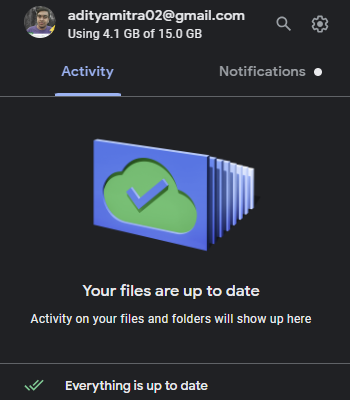

## If you are running it for the first time, do this

Go to This PC -> Drive -> MyDrive -> Serva -> Run installer.bat as administrator

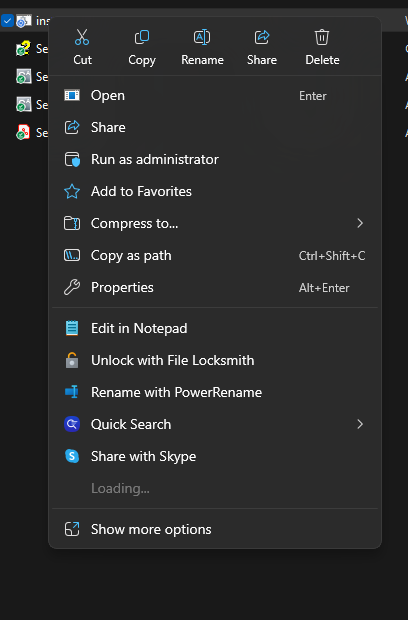

## Do this every time

Runner.bat is set to run at startup so you dont have to do anything. If it fails do the following.

Go to This PC -> Drive -> MyDrive -> Serva -> Run configcreator.bat

It will open Serva.

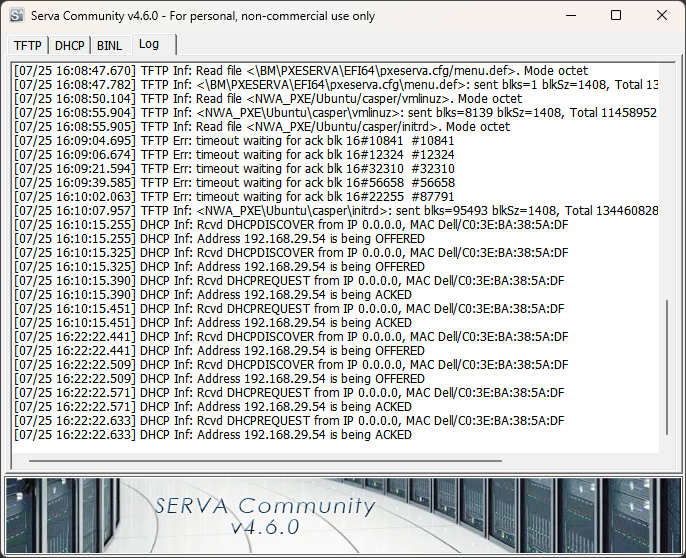

Note: If Serva shows Error: Files not found, exit Serva and reopen it.

Now connect the Target machine to the Switch and Boot it over PXE

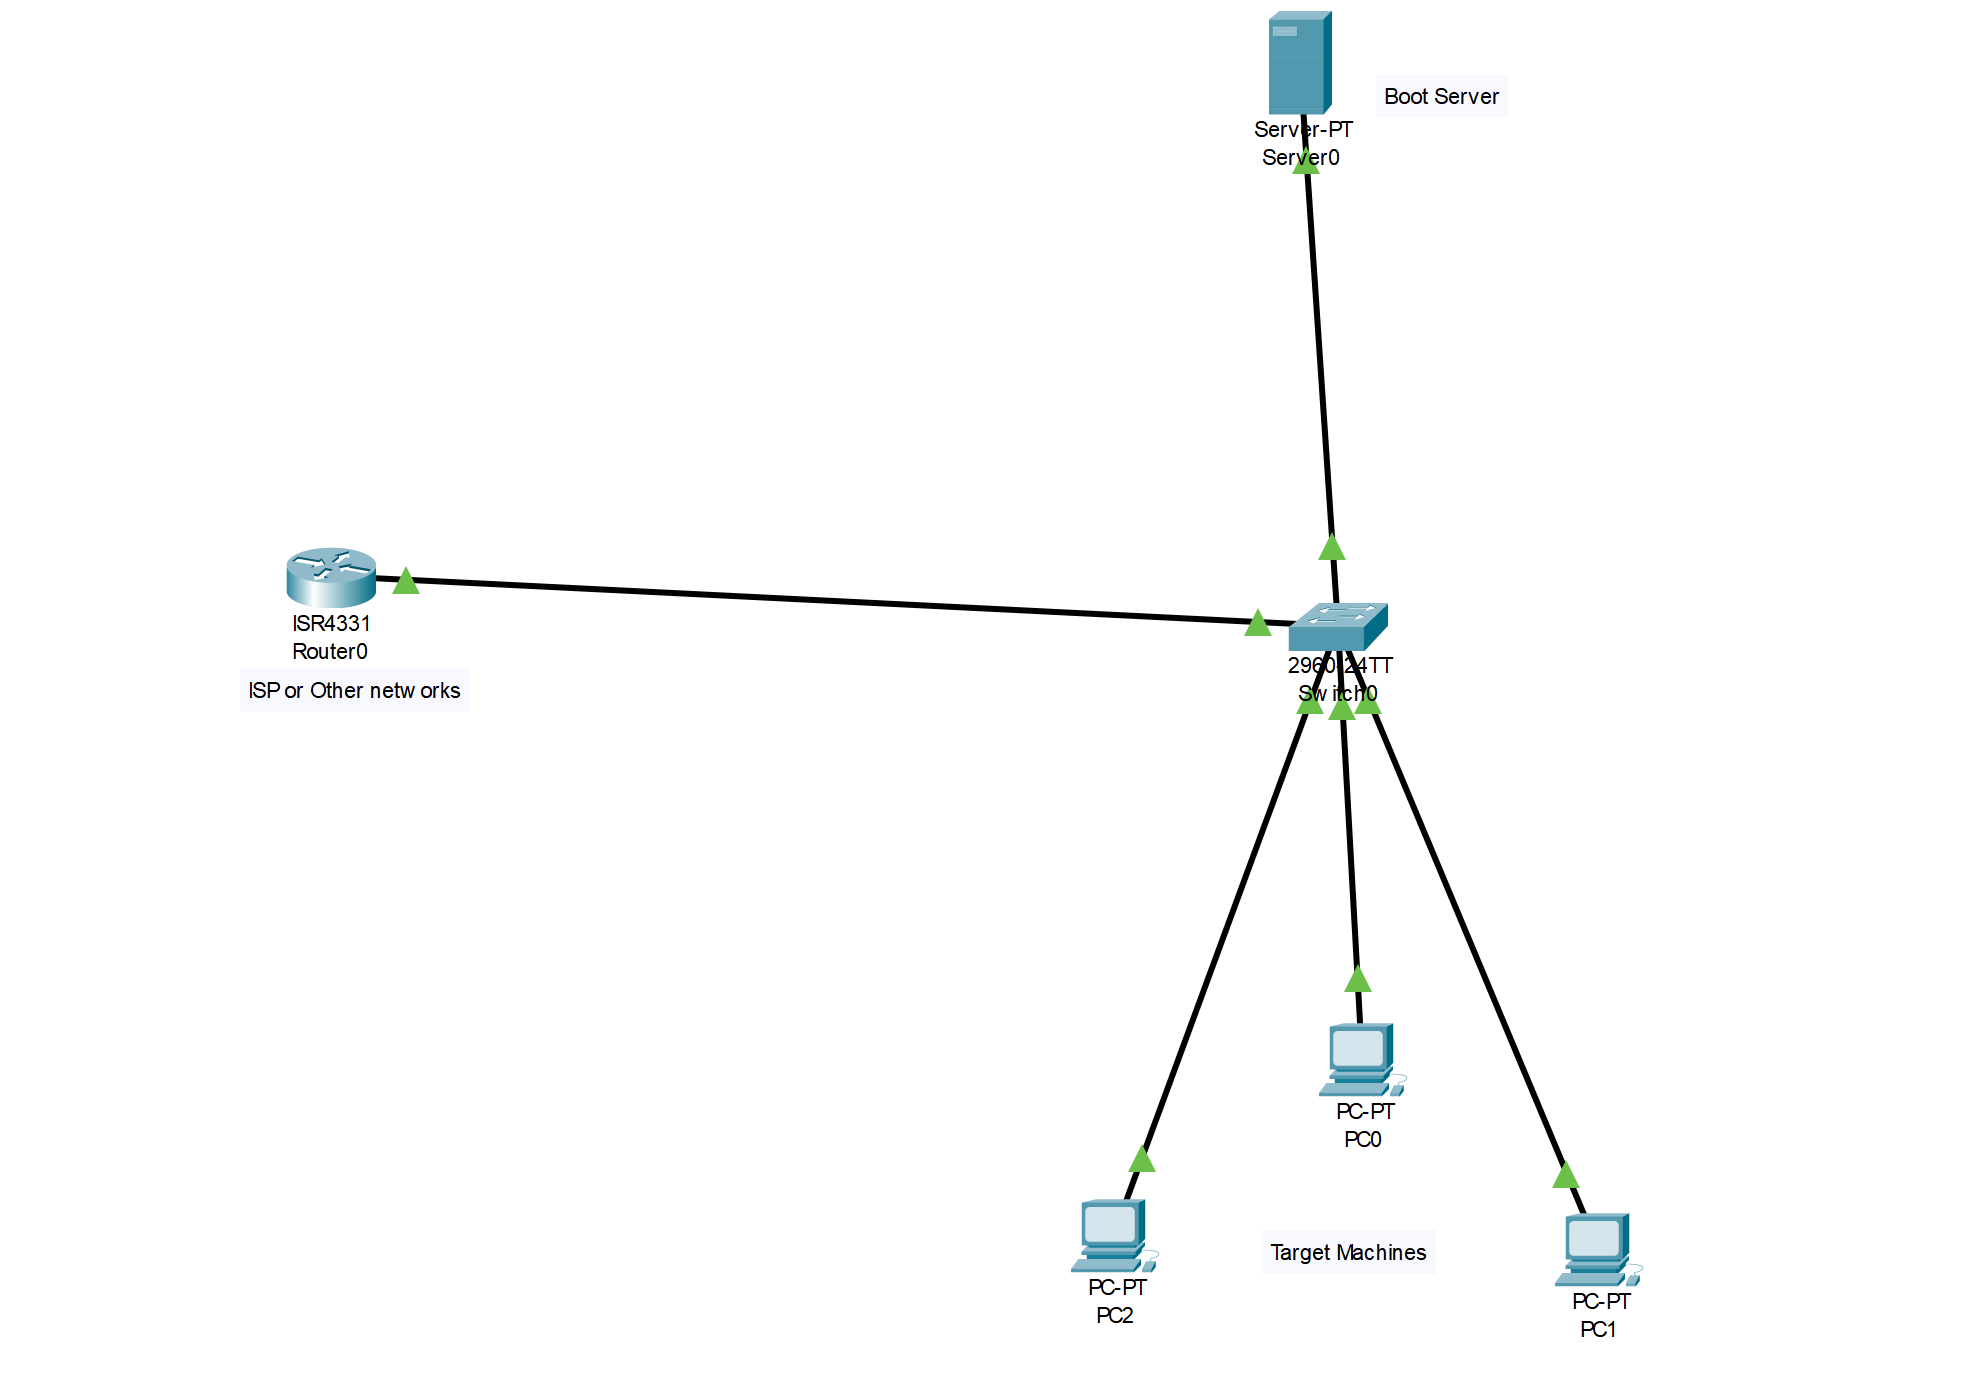

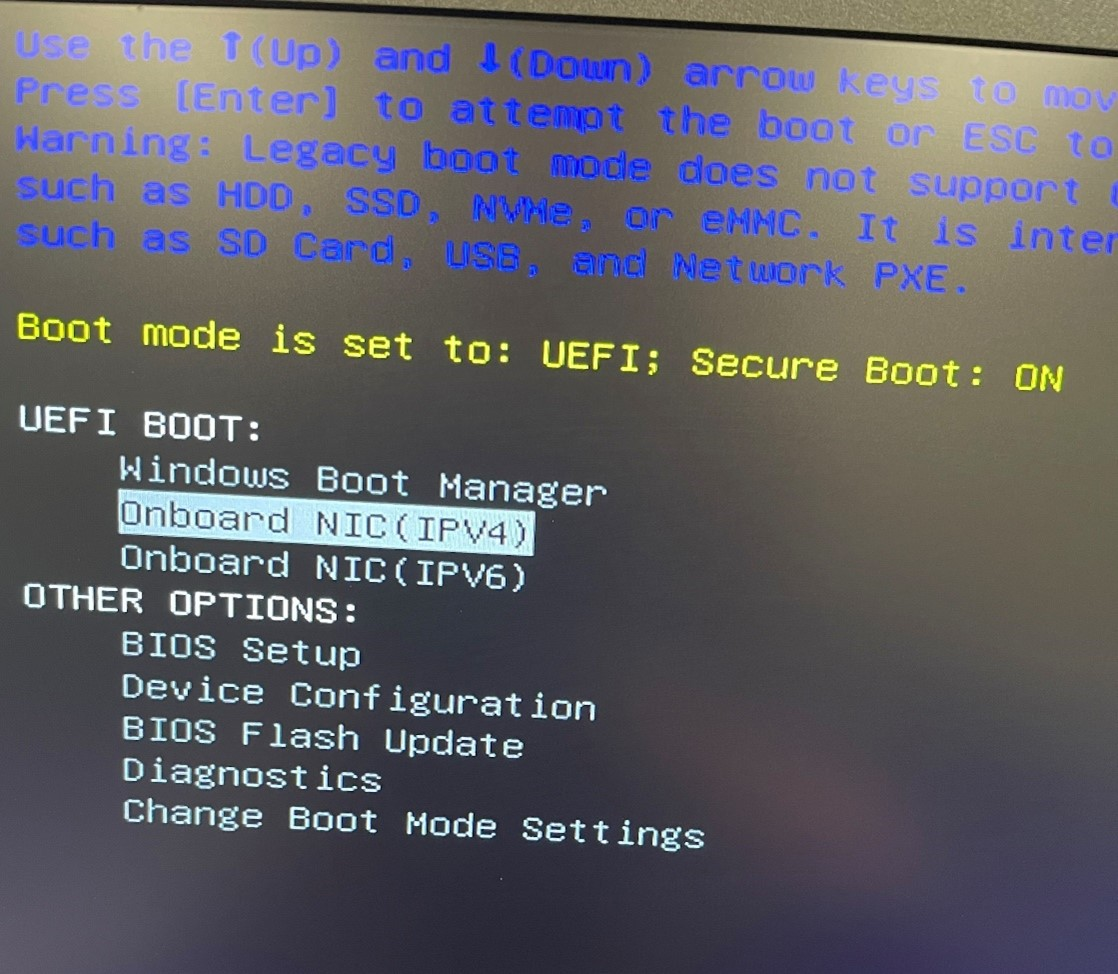

It starts booting

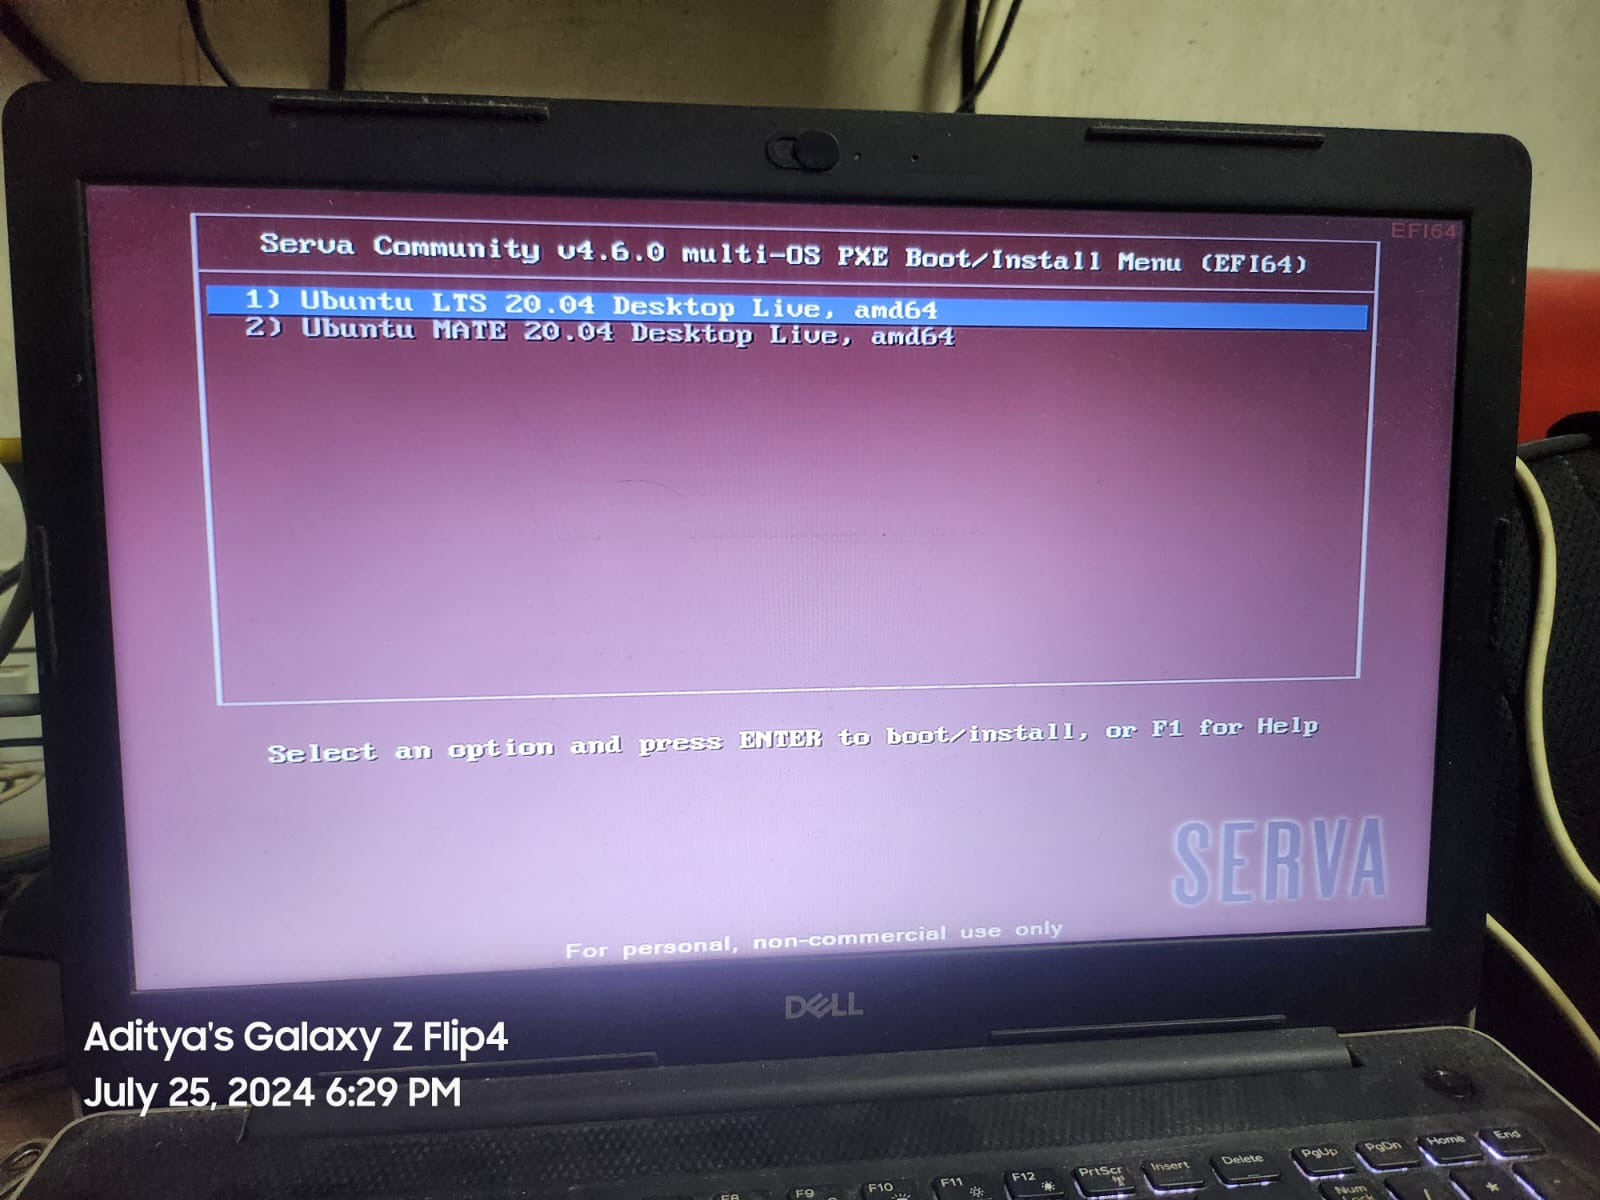

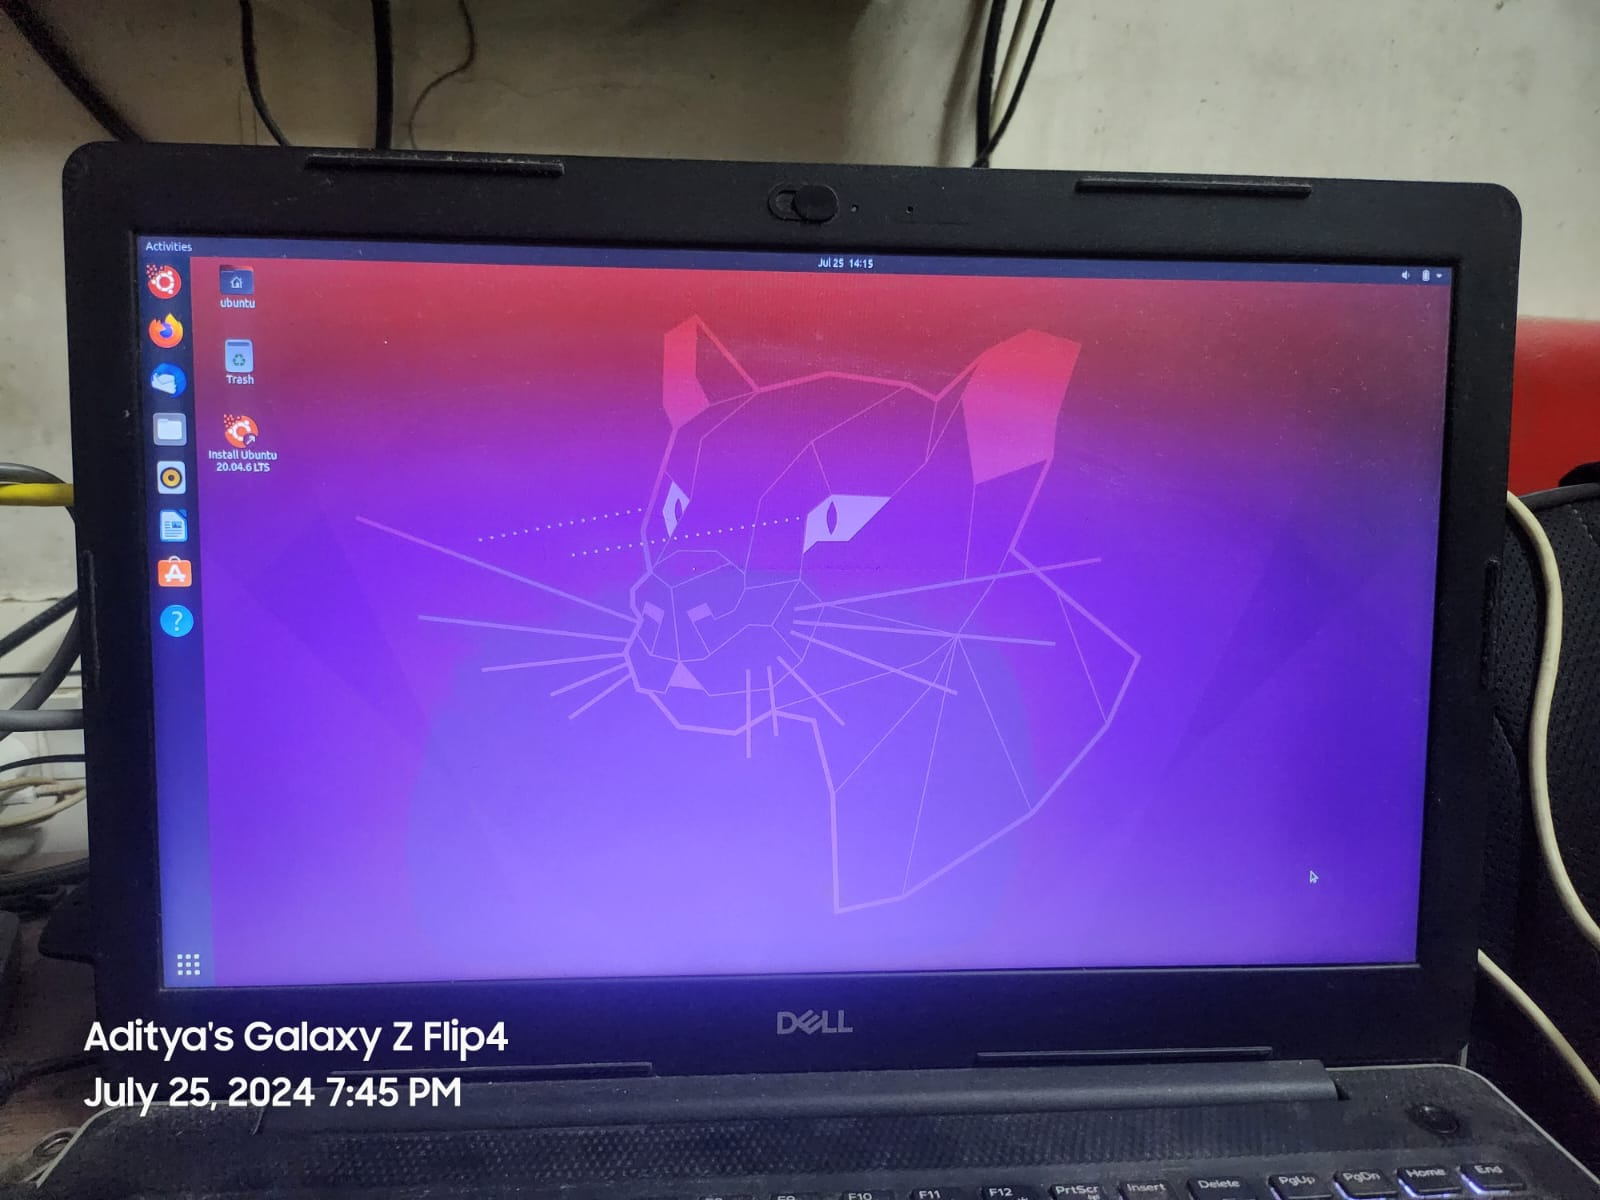

Note: This program uses Serva community edition and hence can load a max of 2 operating systems and can work with a max of 2 clients at a time

## Current Setup:


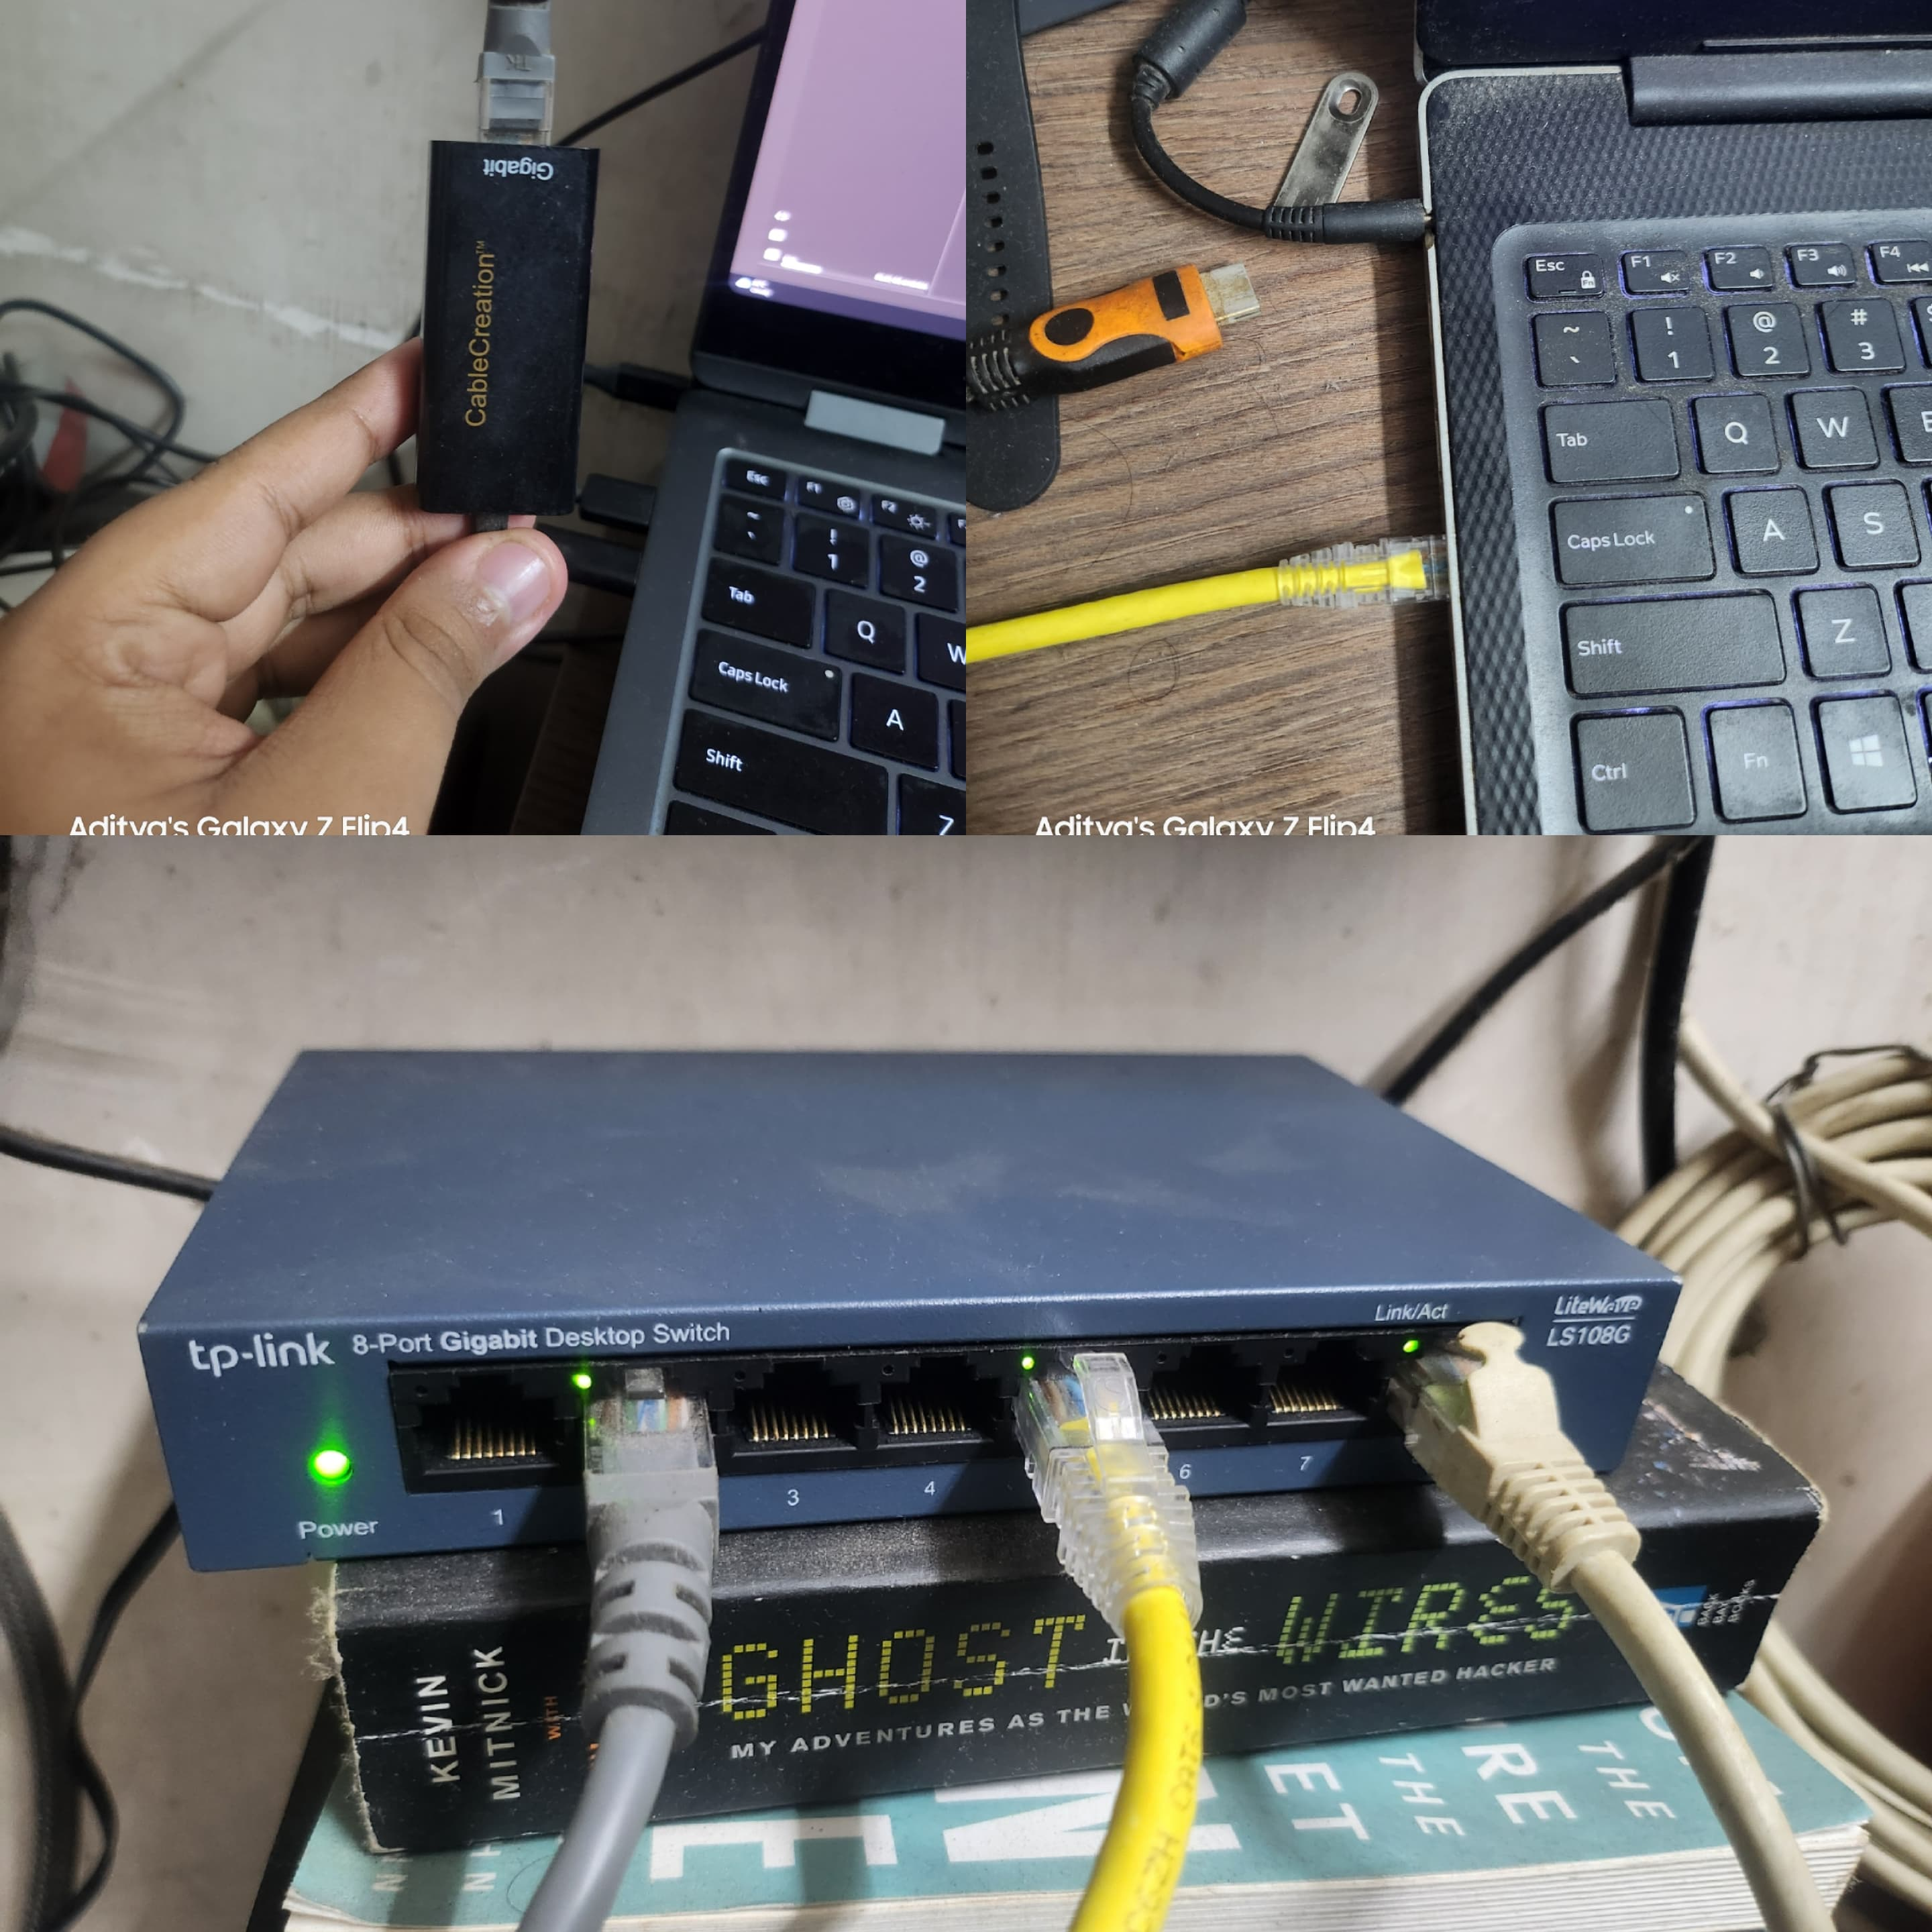

## Testing with Virtual Machine



*   Create a VM with VirtualBox or VM Ware Workstation.
*   Set Network boot to be first boot device
*   The Machine may not have a disk connected
*   The NIC should be a bridged adapter connecting to the network of the switch.







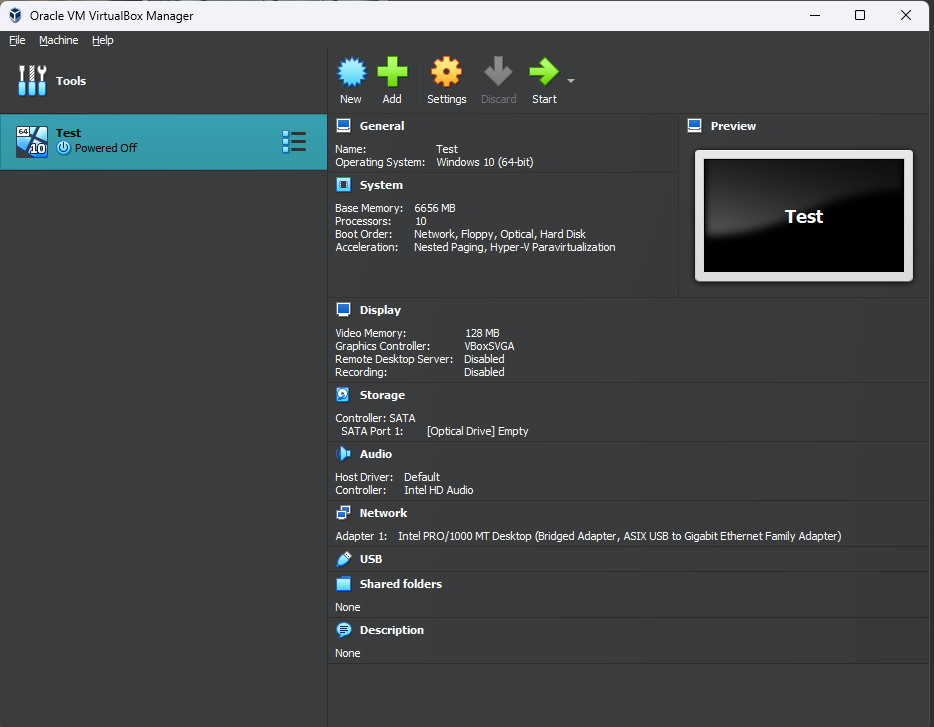

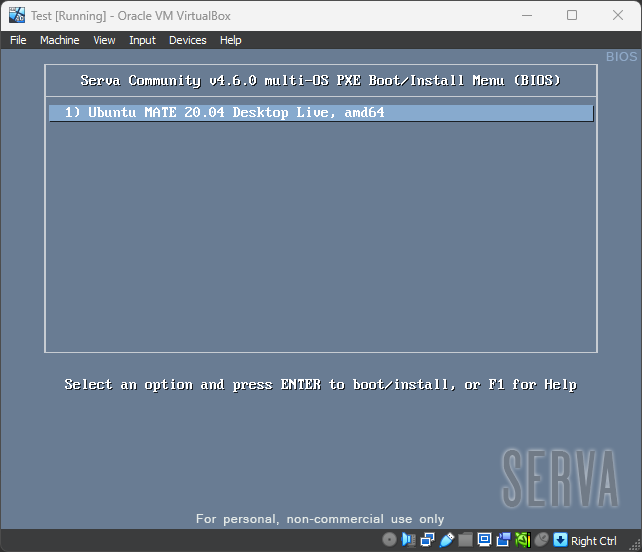

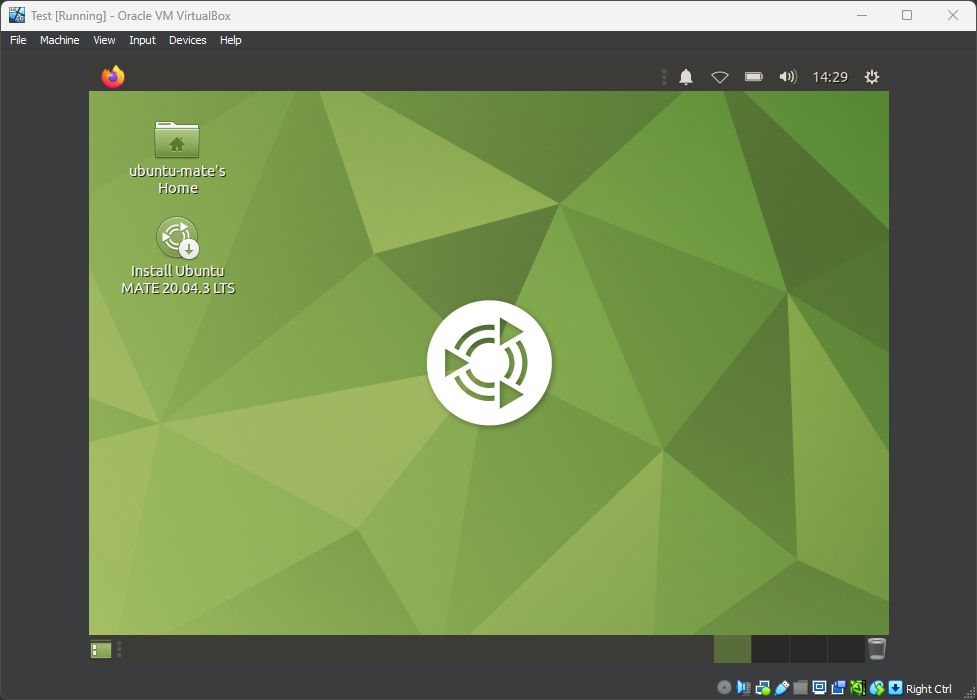

# The End